In [1]:
import numpy as np
import pandas as pd
import math #mathematical functions

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode #just for mode
from scipy.special import binom #binomial distribution
from scipy.stats import iqr #only for interquartile range

In [5]:
ford = pd.read_csv(r"C:\Users\wzulf\Desktop\CDSS\Data\ford.csv")

In [6]:
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
ford.model=ford.model.astype('category')

In [11]:
ford.transmission=ford.transmission.astype('category')

In [12]:
ford.fuelType=ford.fuelType.astype('category')

In [13]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         17966 non-null  category
 1   year          17966 non-null  int64   
 2   price         17966 non-null  int64   
 3   transmission  17966 non-null  category
 4   mileage       17966 non-null  int64   
 5   fuelType      17966 non-null  category
 6   tax           17966 non-null  int64   
 7   mpg           17966 non-null  float64 
 8   engineSize    17966 non-null  float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 896.0 KB


In [14]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [15]:
ford.describe(include='category')

,model,transmission,fuelType
count,17966,17966,17966
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6557,15518,12179


In [17]:
ford.describe(include=['float','category'])

,model,transmission,fuelType,mpg,engineSize
count,17966,17966,17966,17966.000000,17966.000000
unique,24,3,5,NaN,NaN
top,Fiesta,Manual,Petrol,NaN,NaN
freq,6557,15518,12179,NaN,NaN
mean,NaN,NaN,NaN,57.906980,1.350807
std,NaN,NaN,NaN,10.125696,0.432367
min,NaN,NaN,NaN,20.800000,0.000000
25%,NaN,NaN,NaN,52.300000,1.000000
50%,NaN,NaN,NaN,58.900000,1.200000
75%,NaN,NaN,NaN,65.700000,1.500000


In [18]:
print("The unique categories of model are:")
ford.model.unique()

The unique categories of model are:


[' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ..., ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', 'Focus']
Length: 24
Categories (24, object): [' Fiesta', ' Focus', ' Puma', ' Kuga', ..., ' Streetka', ' Escort', ' Transit Tourneo', 'Focus']

In [19]:
print("The unique categories of transmission are:")
ford.transmission.unique()

The unique categories of transmission are:


['Automatic', 'Manual', 'Semi-Auto']
Categories (3, object): ['Automatic', 'Manual', 'Semi-Auto']

In [20]:
print("The unique categories of fuelType are:")
ford.fuelType.unique()

The unique categories of fuelType are:


['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other']
Categories (5, object): ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other']

In [22]:
print("The frequency table of model are:\n")
ford.model.value_counts()

The frequency table of model are:



 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Transit Tourneo             1
 Ranger                      1
 Escort                      1
Focus                        1
Name: model, dtype: int64

In [23]:
print("The frequency table of transmission are:\n")
ford.transmission.value_counts()

The frequency table of transmission are:



Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [24]:
print("The frequency table of fuelType are:\n")
ford.fuelType.value_counts()

The frequency table of fuelType are:



Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

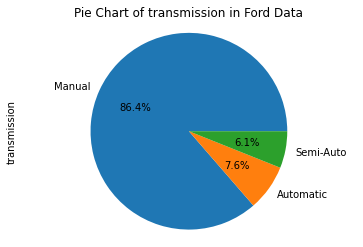

In [25]:
ford.transmission.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Pie Chart of transmission in Ford Data")

plt.axis('equal') #applied to any piechart, and only for piechart
plt.show()

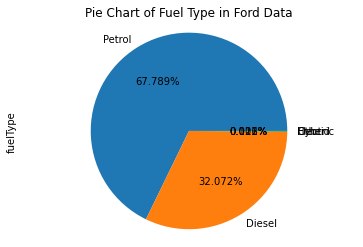

In [29]:
ford.fuelType.value_counts().plot.pie(autopct='%.3f%%',
                                     title = "Pie Chart of Fuel Type in Ford Data")

plt.axis('equal') #applied to any piechart, and only for piechart
plt.show()

<AxesSubplot:title={'center':'Bar Chart of Fuel Type in Ford Data'}>

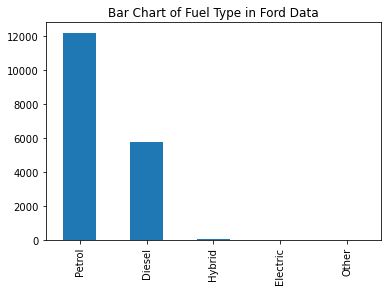

In [31]:
ford.fuelType.value_counts().plot.bar(title = "Bar Chart of Fuel Type in Ford Data")

<AxesSubplot:title={'center':'Bar Chart of Model in Ford Data'}>

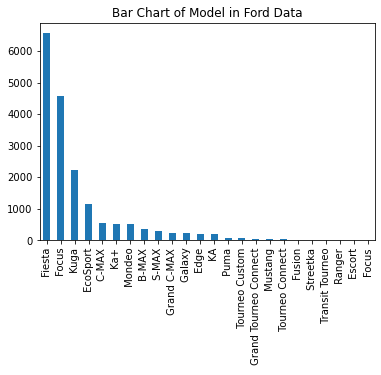

In [32]:
ford.model.value_counts().plot.bar(title = "Bar Chart of Model in Ford Data")

In [33]:
ford.mean()

year           2016.866470
price         12279.534844
mileage       23362.608761
tax             113.329456
mpg              57.906980
engineSize        1.350807
dtype: float64

In [38]:
ford[['year','price','mileage','tax','mpg','engineSize']].median

<bound method DataFrame.median of        year  price  mileage  tax   mpg  engineSize
0      2017  12000    15944  150  57.7         1.0
1      2018  14000     9083  150  57.7         1.0
2      2017  13000    12456  150  57.7         1.0
3      2019  17500    10460  145  40.3         1.5
4      2019  16500     1482  145  48.7         1.0
...     ...    ...      ...  ...   ...         ...
17961  2017   8999    16700  150  47.1         1.4
17962  2014   7499    40700   30  57.7         1.0
17963  2015   9999     7010   20  67.3         1.6
17964  2018   8299     5007  145  57.7         1.2
17965  2015   8299     5007   22  57.7         1.0

[17966 rows x 6 columns]>

In [39]:
ford.median()

year           2017.0
price         11291.0
mileage       18242.5
tax             145.0
mpg              58.9
engineSize        1.2
dtype: float64

In [40]:
ford.mode()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,10000,Manual,10,Petrol,145,65.7,1.0


In [42]:
print(f"""
The minimum is {min(ford.price)}
The maximum is {max(ford.price)}
The first quartile is {np.quantile(ford.price,.25)}
The median is {np.median(ford.price)}
The third quartile is {np.quantile(ford.price,.75)}
The range is {max(ford.price) - min(ford.price)}
The IQR is {iqr(ford.price)}
The lower fence is {np.quantile(ford.price,.25) - 1.5 * iqr(ford.price)}
The upper fence is {np.quantile(ford.price,.75) + 1.5 * iqr(ford.price)}
""")


The minimum is 495
The maximum is 54995
The first quartile is 8999.0
The median is 11291.0
The third quartile is 15299.0
The range is 54500
The IQR is 6300.0
The lower fence is -451.0
The upper fence is 24749.0



In [43]:
ford.var()

year          4.203878e+00
price         2.248034e+07
mileage       3.791609e+08
tax           3.845545e+03
mpg           1.025297e+02
engineSize    1.869415e-01
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20dcfcbe128>,
 'caps': [<matplotlib.lines.Line2D at 0x20dcfcbe710>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dcfc8efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20dcfcbecc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20dcfcbef98>],
 'means': []}

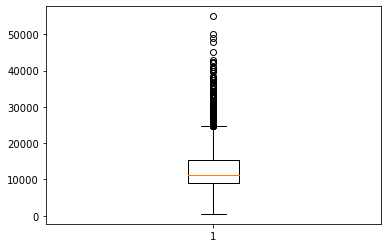

In [44]:
plt.boxplot(ford.price)

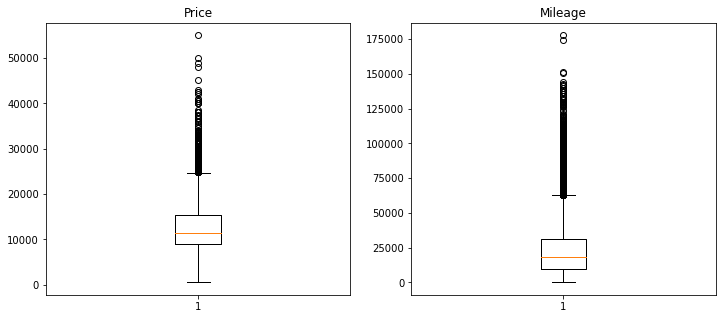

In [49]:
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].boxplot(ford.price)
ax[0].set_title('Price')
ax[1].boxplot(ford.mileage)
ax[1].set_title('Mileage');

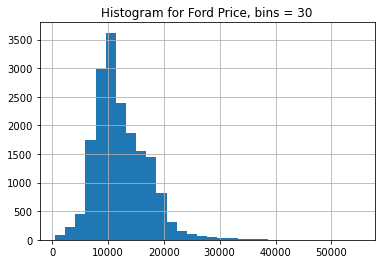

In [46]:
ford.loc[  :  , 'price'].hist(bins=30)
plt.title('Histogram for Ford Price, bins = 30' )
plt.show()

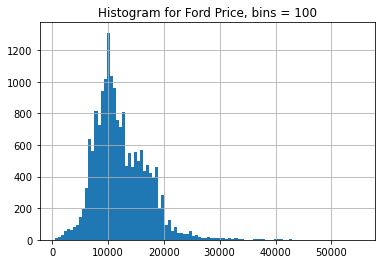

In [51]:
ford.loc[  :  , 'price'].hist(bins=100)
plt.title('Histogram for Ford Price, bins = 100' )
plt.show()

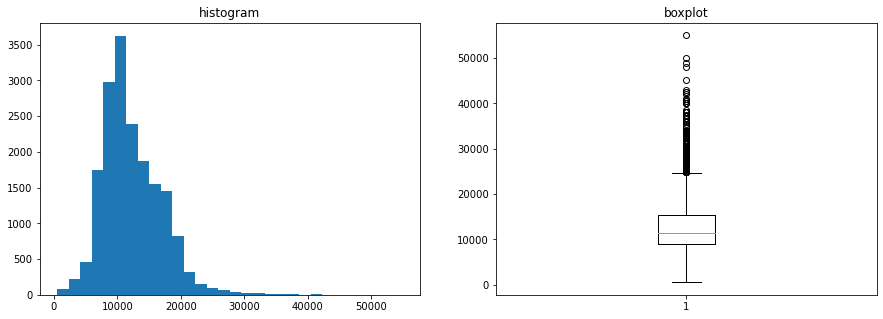

In [53]:
fg, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].hist(Ford['price'],bins=30)
ax[0].set_title('histogram')

ax[1].boxplot(Ford['price'])
ax[1].set_title('boxplot');

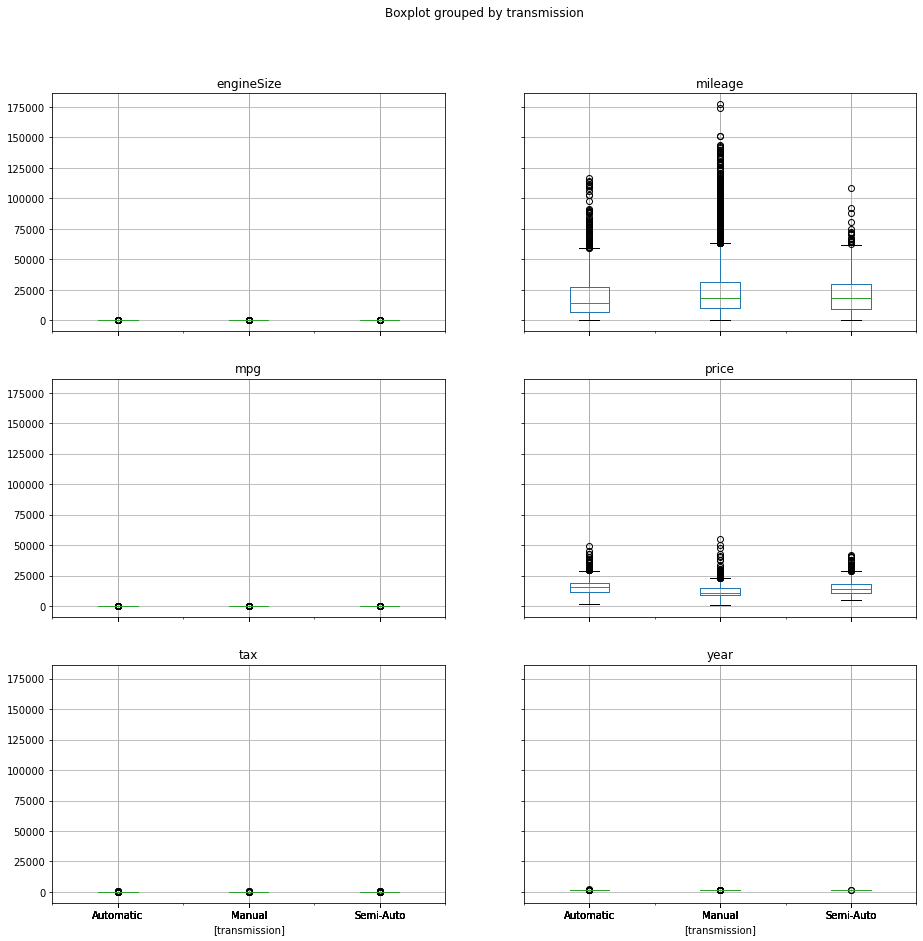

In [57]:
ford.boxplot(by='transmission',figsize=(15, 15));

In [64]:
ford_tab = pd.crosstab(ford.loc[:, "fuelType"],ford.loc[:,"transmission"])
 
ford_tab

transmission,Automatic,Manual,Semi-Auto
fuelType,,,
Diesel,565,4694,503
Electric,2,0,0
Hybrid,19,1,2
Other,1,0,0
Petrol,774,10823,582


In [67]:
(pd.crosstab(ford.loc[:, "fuelType"],
            ford.loc[:,"transmission"],
            normalize = "index") * 100).round(2)

transmission,Automatic,Manual,Semi-Auto
fuelType,,,
Diesel,9.81,81.46,8.73
Electric,100.00,0.00,0.00
Hybrid,86.36,4.55,9.09
Other,100.00,0.00,0.00
Petrol,6.36,88.87,4.78


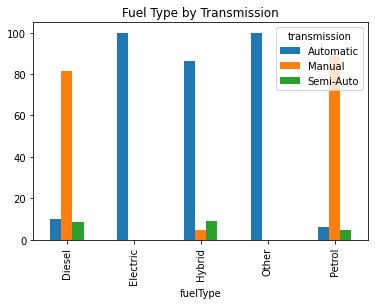

In [68]:
(pd.crosstab(ford.loc[:, "fuelType"],
            ford.loc[:,"transmission"],
            normalize = "index") * 100).round(2).plot.bar(title = "Fuel Type by Transmission");

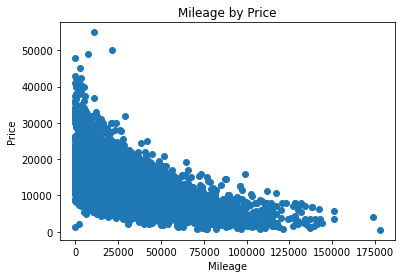

In [69]:
plt.scatter(x = "mileage", y = "price", data = ford)
plt.title("Mileage by Price")
plt.xlabel('Mileage')
plt.ylabel('Price');

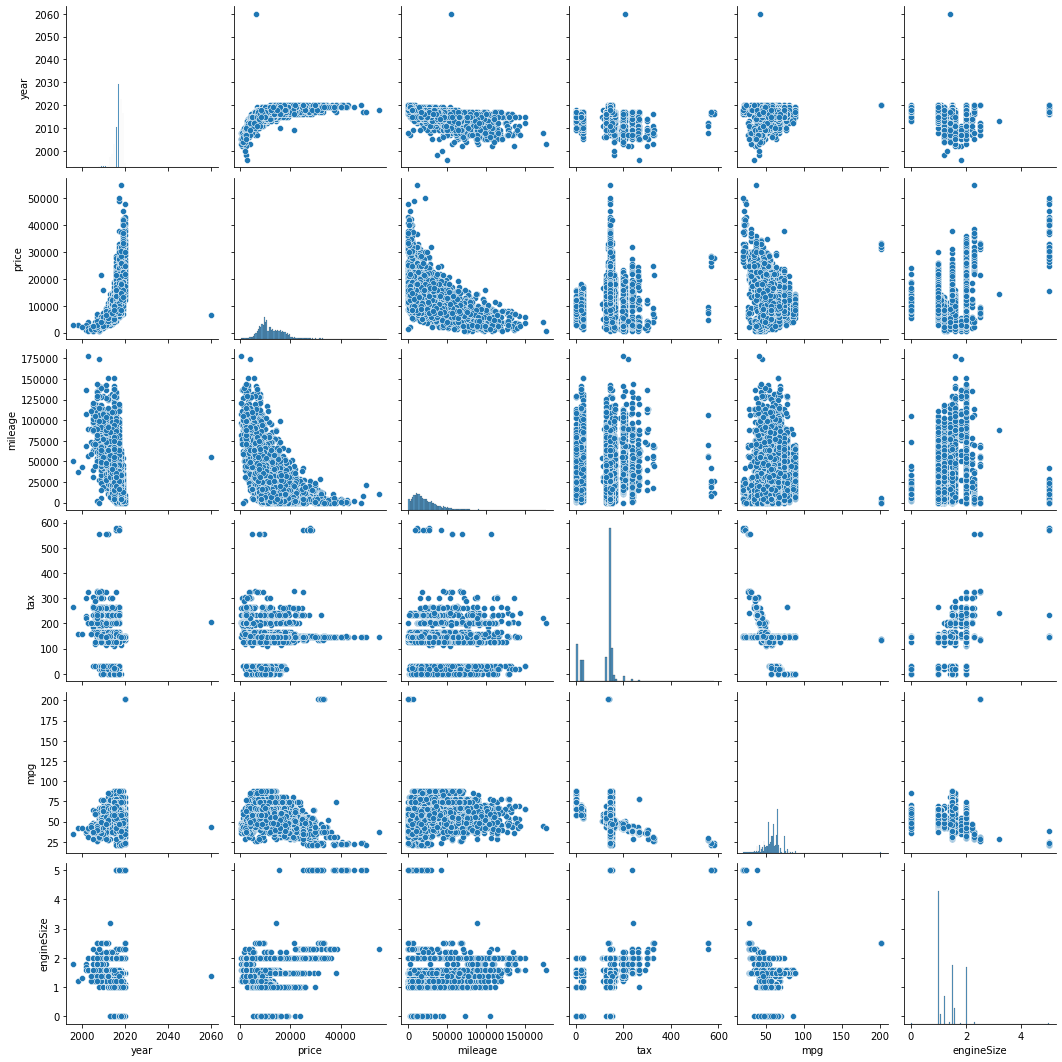

In [58]:
sns.pairplot(ford);

In [59]:
ford.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


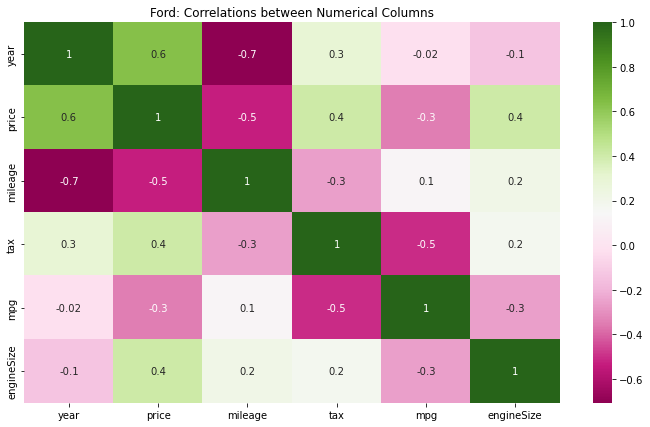

In [61]:
# Heat Map of Correlations
corr_matrix = ford.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Ford: Correlations between Numerical Columns');